In [1]:
import scipy.cluster.hierarchy as  shc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
data = pd.read_csv("./data/Behavioral Finance and Investment Decision.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            1500 non-null   object
 1   Age             1500 non-null   int64 
 2   Gender          1500 non-null   object
 3   Education       1500 non-null   object
 4   Monthly Income  1500 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 58.7+ KB


In [4]:
data.isna().sum()

Name              0
Age               0
Gender            0
Education         0
Monthly Income    0
dtype: int64

In [5]:
data.describe(include='all')

,Name,Age,Gender,Education,Monthly Income
count,1500,1500.000000,1500,1500,1500.000000
unique,389,NaN,2,5,NaN
top,Manisha Shinde,NaN,Female,Bachelors degree,NaN
freq,11,NaN,758,319,NaN
mean,NaN,39.864000,NaN,NaN,42456.714000
std,NaN,11.791785,NaN,NaN,15773.637414
min,NaN,20.000000,NaN,NaN,15006.000000
25%,NaN,30.000000,NaN,NaN,29143.500000
50%,NaN,40.000000,NaN,NaN,41863.000000
75%,NaN,50.000000,NaN,NaN,56229.000000


In [6]:
data.columns

Index(['Name', 'Age', 'Gender', 'Education', 'Monthly Income'], dtype='object')

<Axes: xlabel='Gender'>

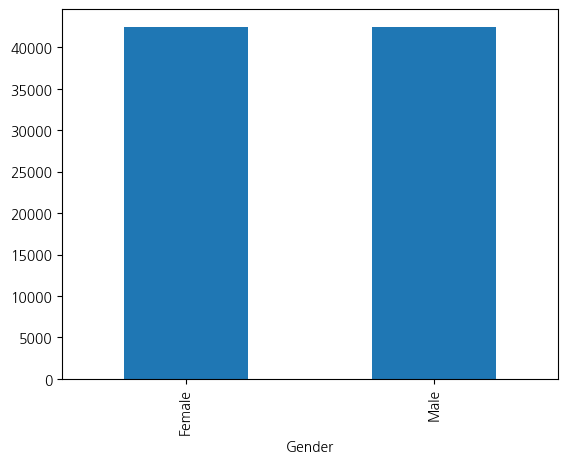

In [7]:
# 성별별 월 소득
Gd_MI = data.groupby('Gender')['Monthly Income'].mean()
Gd_MI.plot(kind='bar')

<Axes: xlabel='Education'>

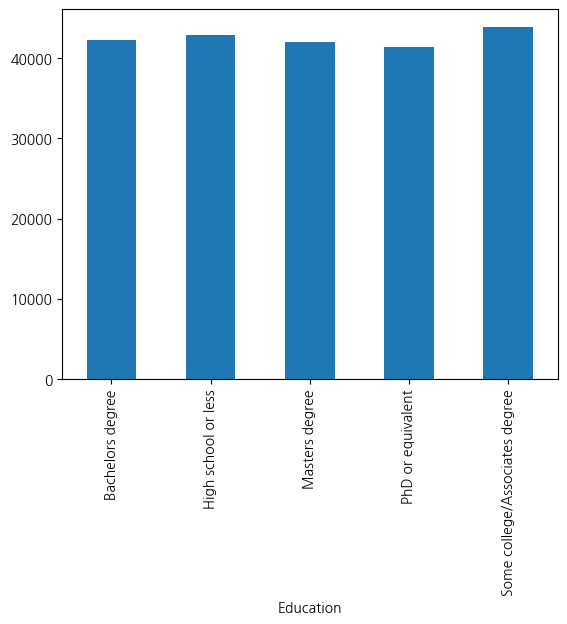

In [8]:
# 교육별 월 소득
Ed_MI = data.groupby('Education')['Monthly Income'].mean()
Ed_MI.plot(kind='bar')

In [9]:
data['Monthly Income'].mean()

np.float64(42456.714)

In [10]:
data.describe()

,Age,Monthly Income
count,1500.000000,1500.000000
mean,39.864000,42456.714000
std,11.791785,15773.637414
min,20.000000,15006.000000
25%,30.000000,29143.500000
50%,40.000000,41863.000000
75%,50.000000,56229.000000
max,60.000000,69973.000000


<Axes: >

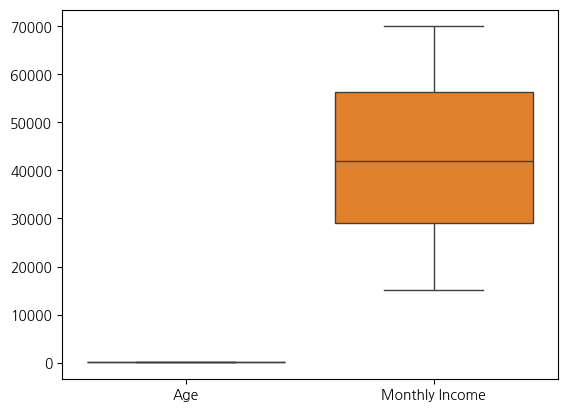

In [11]:
sns.boxplot(data)

In [14]:
num_cols = data.select_dtypes(exclude='object')
num_cols

,Age,Monthly Income
0,47,16321
1,45,57755
2,55,18463
3,37,36237
4,50,64124
...,...,...
1495,42,66525
1496,57,30220
1497,48,38589
1498,33,36351


In [16]:
cat_cols = data.select_dtypes(include='object')
cat_cols

,Name,Gender,Education
0,Aishwarya Dhole,Female,Some college/Associates degree
1,Snehal More,Female,PhD or equivalent
2,Rohit Chavan,Male,PhD or equivalent
3,Nikhil Shinde,Male,High school or less
4,Anjali Phadke,Female,Some college/Associates degree
...,...,...,...
1495,Ashwini Kadam,Female,High school or less
1496,Anjali Phadke,Female,Masters degree
1497,Vaishnavi Joshi,Female,Some college/Associates degree
1498,Gaurav Deshmukh,Male,Some college/Associates degree


In [18]:
from sklearn.cluster import AgglomerativeClustering

In [21]:
from sklearn.preprocessing import StandardScaler

In [23]:
ss =StandardScaler()
ss_scaled = ss.fit_transform(num_cols)
ss_scaled = pd.DataFrame(ss_scaled,columns=num_cols.columns)
ss_scaled

,Age,Monthly Income
0,0.605369,-1.657476
1,0.435703,0.970188
2,1.284034,-1.521635
3,-0.242962,-0.394442
4,0.859868,1.374097
...,...,...
1495,0.181203,1.526364
1496,1.453700,-0.776029
1497,0.690202,-0.245283
1498,-0.582294,-0.387213


In [25]:
cat_cols = data.select_dtypes(include='object')
cat_cols = pd.get_dummies(cat_cols,drop_first=True)
cat_cols

,Name_Aditya Bhosale,Name_Aditya Chavan,Name_Aditya Deshmukh,Name_Aditya Dhole,Name_Aditya Gokhale,Name_Aditya Jadhav,Name_Aditya Joshi,Name_Aditya Kadam,Name_Aditya Kulkarni,Name_Aditya More,...,Name_Vaishnavi Phadke,Name_Vaishnavi Salunke,Name_Vaishnavi Sawant,Name_Vaishnavi Shinde,Name_Vaishnavi Thorat,Gender_Male,Education_High school or less,Education_Masters degree,Education_PhD or equivalent,Education_Some college/Associates degree
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [26]:
scaled_df2 = pd.concat([cat_cols,ss_scaled],axis=1)
scaled_df2

,Name_Aditya Bhosale,Name_Aditya Chavan,Name_Aditya Deshmukh,Name_Aditya Dhole,Name_Aditya Gokhale,Name_Aditya Jadhav,Name_Aditya Joshi,Name_Aditya Kadam,Name_Aditya Kulkarni,Name_Aditya More,...,Name_Vaishnavi Sawant,Name_Vaishnavi Shinde,Name_Vaishnavi Thorat,Gender_Male,Education_High school or less,Education_Masters degree,Education_PhD or equivalent,Education_Some college/Associates degree,Age,Monthly Income
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,0.605369,-1.657476
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,0.435703,0.970188
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,1.284034,-1.521635
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,-0.242962,-0.394442
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,0.859868,1.374097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,0.181203,1.526364
1496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,1.453700,-0.776029
1497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,0.690202,-0.245283
1498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,-0.582294,-0.387213


In [27]:
from sklearn.cluster import KMeans

In [28]:
km = KMeans(random_state=42)
km.fit(scaled_df2)
result = km.labels_
result

array([0, 6, 0, ..., 3, 5, 6], dtype=int32)

In [30]:
data['kmeans8'] = result
data

,Name,Age,Gender,Education,Monthly Income,kmeans8
0,Aishwarya Dhole,47,Female,Some college/Associates degree,16321,0
1,Snehal More,45,Female,PhD or equivalent,57755,6
2,Rohit Chavan,55,Male,PhD or equivalent,18463,0
3,Nikhil Shinde,37,Male,High school or less,36237,1
4,Anjali Phadke,50,Female,Some college/Associates degree,64124,2
...,...,...,...,...,...,...
1495,Ashwini Kadam,42,Female,High school or less,66525,6
1496,Anjali Phadke,57,Female,Masters degree,30220,0
1497,Vaishnavi Joshi,48,Female,Some college/Associates degree,38589,3
1498,Gaurav Deshmukh,33,Male,Some college/Associates degree,36351,5


In [32]:
data[data['kmeans8']==0].describe(include='all')

,Name,Age,Gender,Education,Monthly Income,kmeans8
count,272,272.000000,272,272,272.000000,272.0
unique,199,NaN,2,5,NaN,NaN
top,Snehal More,NaN,Female,Masters degree,NaN,NaN
freq,3,NaN,143,69,NaN,NaN
mean,NaN,51.547794,NaN,NaN,26865.694853,0.0
std,NaN,5.093002,NaN,NaN,7182.170728,0.0
min,NaN,41.000000,NaN,NaN,15006.000000,0.0
25%,NaN,48.000000,NaN,NaN,20834.500000,0.0
50%,NaN,52.000000,NaN,NaN,25913.500000,0.0
75%,NaN,56.000000,NaN,NaN,32566.250000,0.0


In [33]:
print(km.inertia_)

3175.6114809394585


In [34]:
inertia = []
for i in range(2,21):
    km = KMeans(n_clusters=i,random_state=42)
    km.fit(scaled_df2)
    inertia.append(km.inertia_)
inertia

[4684.691147541282,
 4026.939190128519,
 3555.3788393659856,
 3420.96632586955,
 3331.1146015284758,
 3249.6194378511336,
 3175.6114809394585,
 3112.7098510661694,
 3052.5268595216785,
 3008.105061129656,
 2945.684712334925,
 2896.709400789156,
 2850.199587024732,
 2817.8410684801174,
 2763.255138326948,
 2707.4254228693208,
 2662.859017099685,
 2631.4999123750786,
 2604.499040784827]

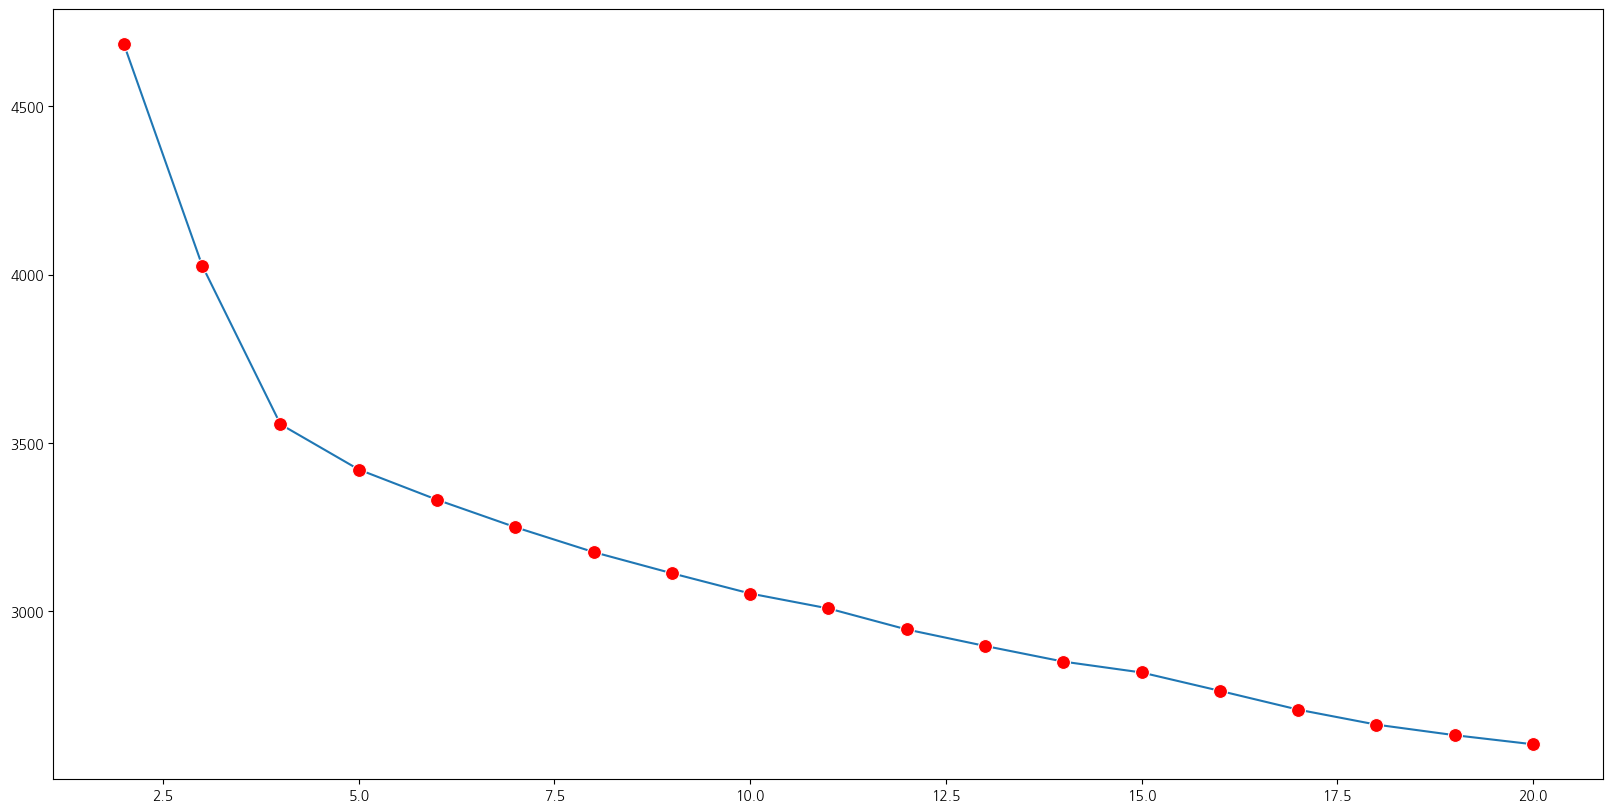

In [35]:
plt.figure(figsize=(20,10))
sns.lineplot(x=range(2,21),y=inertia, marker='o',markersize=10,markerfacecolor='red')
plt.show()

In [36]:
from sklearn.metrics import silhouette_score

In [37]:
sil_score = []
for i in range(2,21):
    km2 = KMeans(n_clusters=i,random_state=42)
    km2.fit(scaled_df2)
    labels = km2.labels_
    sil_score.append(silhouette_score(scaled_df2,labels))
sil_score

[np.float64(0.17228739170304477),
 np.float64(0.15453151005391305),
 np.float64(0.15197477724973565),
 np.float64(0.12771290161412388),
 np.float64(0.10628539601543847),
 np.float64(0.09466119764061606),
 np.float64(0.09595536645455206),
 np.float64(0.08573559002969804),
 np.float64(0.08548603416217902),
 np.float64(0.0841497485504135),
 np.float64(0.08475154157134639),
 np.float64(0.08622160669265179),
 np.float64(0.08917977282223229),
 np.float64(0.0837625902153014),
 np.float64(0.08738623709579049),
 np.float64(0.09392563959136964),
 np.float64(0.09434802171961858),
 np.float64(0.09504295367699397),
 np.float64(0.09427334303641147)]

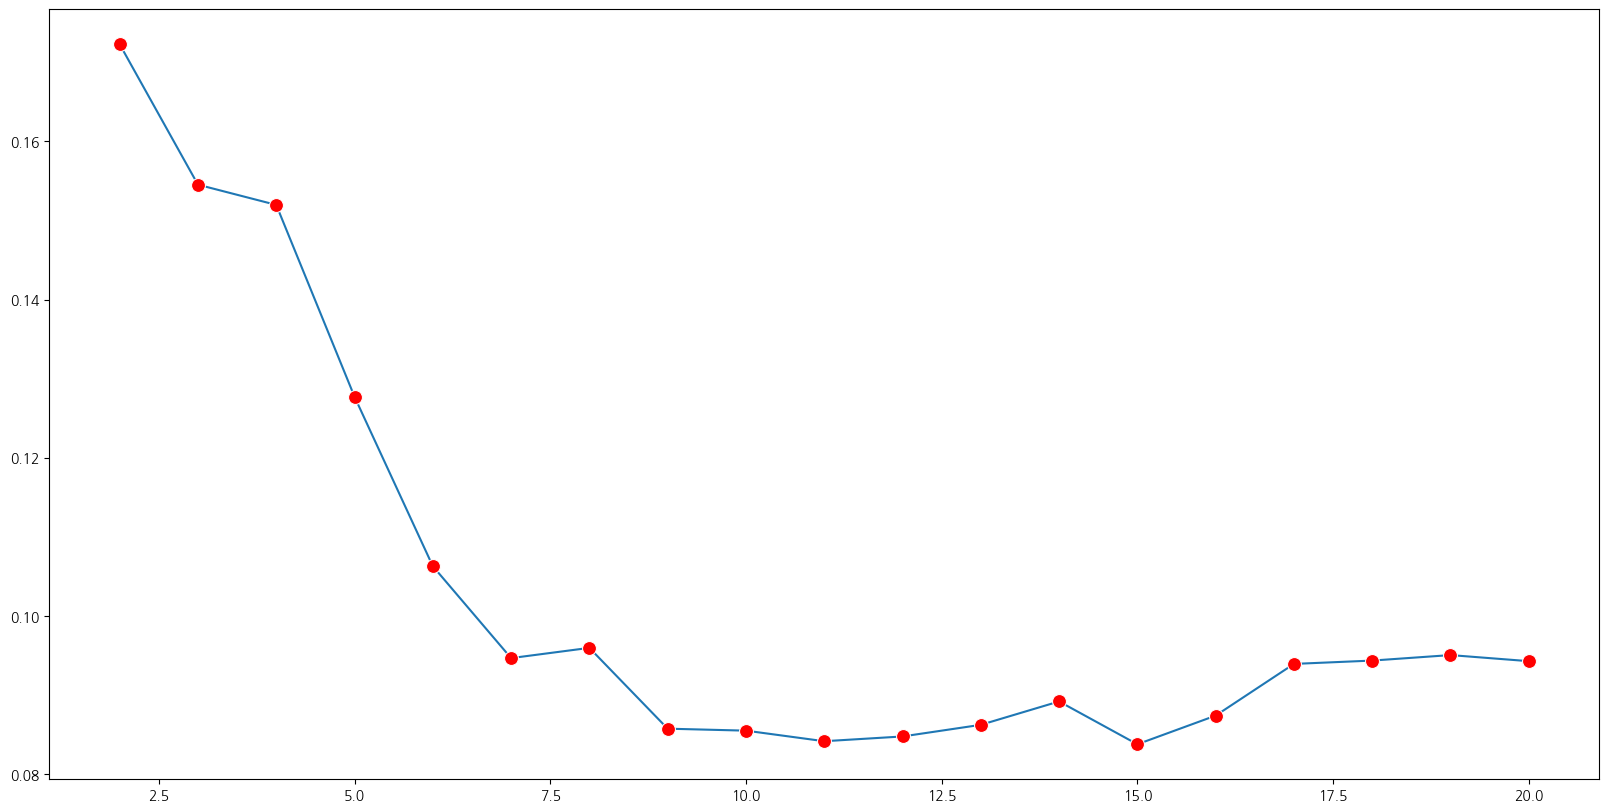

In [38]:
plt.figure(figsize=(20,10))
sns.lineplot(x=range(2,21),y=sil_score, marker='o',markersize=10,markerfacecolor='red')
plt.show()

In [39]:
km3 = KMeans(n_clusters=3,random_state=42)
km3.fit(scaled_df2)
labels = km3.labels_

In [40]:
data['kmeans3'] = labels
data

,Name,Age,Gender,Education,Monthly Income,kmeans8,kmeans3
0,Aishwarya Dhole,47,Female,Some college/Associates degree,16321,0,0
1,Snehal More,45,Female,PhD or equivalent,57755,6,2
2,Rohit Chavan,55,Male,PhD or equivalent,18463,0,0
3,Nikhil Shinde,37,Male,High school or less,36237,1,1
4,Anjali Phadke,50,Female,Some college/Associates degree,64124,2,2
...,...,...,...,...,...,...,...
1495,Ashwini Kadam,42,Female,High school or less,66525,6,2
1496,Anjali Phadke,57,Female,Masters degree,30220,0,0
1497,Vaishnavi Joshi,48,Female,Some college/Associates degree,38589,3,0
1498,Gaurav Deshmukh,33,Male,Some college/Associates degree,36351,5,1


In [42]:
data[data['kmeans3'] == 0].describe(include='all')

,Name,Age,Gender,Education,Monthly Income,kmeans8,kmeans3
count,476,476.000000,476,476,476.000000,476.000000,476.0
unique,277,NaN,2,5,NaN,NaN,NaN
top,Chaitanya Pawar,NaN,Male,Masters degree,NaN,NaN,NaN
freq,5,NaN,243,113,NaN,NaN,NaN
mean,NaN,48.027311,NaN,NaN,29612.495798,1.451681,0.0
std,NaN,6.929820,NaN,NaN,8331.416925,2.025048,0.0
min,NaN,32.000000,NaN,NaN,15006.000000,0.000000,0.0
25%,NaN,42.000000,NaN,NaN,22447.750000,0.000000,0.0
50%,NaN,48.000000,NaN,NaN,29769.500000,0.000000,0.0
75%,NaN,54.000000,NaN,NaN,36696.000000,3.000000,0.0


In [43]:
data[data['kmeans3'] == 1].describe(include='all')

,Name,Age,Gender,Education,Monthly Income,kmeans8,kmeans3
count,568,568.000000,568,568,568.000000,568.000000,568.0
unique,298,NaN,2,5,NaN,NaN,NaN
top,Manisha Shinde,NaN,Female,High school or less,NaN,NaN,NaN
freq,8,NaN,296,121,NaN,NaN,NaN
mean,NaN,27.605634,NaN,NaN,40411.073944,4.625000,1.0
std,NaN,5.173815,NaN,NaN,14496.044103,1.749338,0.0
min,NaN,20.000000,NaN,NaN,15193.000000,1.000000,1.0
25%,NaN,23.000000,NaN,NaN,28832.500000,4.000000,1.0
50%,NaN,27.000000,NaN,NaN,40081.000000,4.000000,1.0
75%,NaN,31.000000,NaN,NaN,51505.250000,7.000000,1.0


In [44]:
data[data['kmeans3'] == 2].describe(include='all')

,Name,Age,Gender,Education,Monthly Income,kmeans8,kmeans3
count,456,456.000000,456,456,456.000000,456.000000,456.0
unique,268,NaN,2,5,NaN,NaN,NaN
top,Kiran Kadam,NaN,Female,Some college/Associates degree,NaN,NaN,NaN
freq,6,NaN,229,104,NaN,NaN,NaN
mean,NaN,46.611842,NaN,NaN,58412.353070,3.596491,2.0
std,NaN,8.465352,NaN,NaN,7240.141287,1.901852,0.0
min,NaN,28.000000,NaN,NaN,43925.000000,1.000000,2.0
25%,NaN,40.000000,NaN,NaN,52553.750000,2.000000,2.0
50%,NaN,47.000000,NaN,NaN,59177.000000,3.000000,2.0
75%,NaN,54.000000,NaN,NaN,64709.000000,6.000000,2.0
